## Import all packages 

In [89]:

%matplotlib inline
import statsmodels.api as sm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.cluster import KMeans
import scipy.spatial.distance as sdist
import sklearn.cluster as cluster
import math

import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm


## Load data

In [2]:
warnings.filterwarnings('ignore')
pd.set_option('max_column',None)
db= pd.read_csv('/home/eyerusalem/Documents/10Academy-week-1-challenge/data/Week1_challenge_data_source(CSV).csv', na_values= ['?', None])
db.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),k,Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [3]:
db.shape[1],db.shape[0]

(55, 150001)

# Task 1 - User Overview analysis 

- For the actual telecom dataset, you‘re expected to conduct a full User Overview analysis & the following sub-tasks are your guidance: 

  - Start by identifying the top 10 handsets used by the customers.
  - Then, identify the top 3 handset manufacturers
  - Next, identify the top 5 handsets per top 3 handset manufacturer
  - Make a short interpretation and recommendation to marketing teams



In [4]:
def percent_missing(df):
    totalcells= np.product(df.shape)
   
    missingCount= df.isnull().sum()
    #print(missingCount)
    totalMissing= missingCount.sum()
    print("The telecom data contains", round(((totalMissing/totalcells)*100),3),"%" ,"missing values")

In [5]:
percent_missing(db['Nb of sec with 6250B < Vol UL < 37500B'])

The telecom data contains 74.562 % missing values


In [6]:
db.isna().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [7]:
df_clean= db.drop(['Nb of sec with 125000B < Vol DL' ,'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B','Nb of sec with 37500B < Vol UL' ,'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B','Nb of sec with 6250B < Vol UL < 37500B'], axis=1)

In [8]:
df_clean.shape

(150001, 49)

In [9]:
#remove rows that have nans in the bearer id and msisdn number columns
df = df_clean[~np.isnan(db['Bearer Id'])]
df = df_clean[~np.isnan(db['MSISDN/Number'])]

In [10]:
# Now which column(s) has missing values
df.isna().sum()

Bearer Id                           429
Start                                 0
Start ms                              0
End                                   0
End ms                                0
Dur. (ms)                             0
IMSI                                  0
MSISDN/Number                         0
IMEI                                  0
Last Location Name                  589
Avg RTT DL (ms)                   27644
Avg RTT UL (ms)                   27625
Avg Bearer TP DL (kbps)               0
Avg Bearer TP UL (kbps)               0
TCP DL Retrans. Vol (Bytes)       87796
TCP UL Retrans. Vol (Bytes)       96192
DL TP < 50 Kbps (%)                 720
50 Kbps < DL TP < 250 Kbps (%)      720
250 Kbps < DL TP < 1 Mbps (%)       720
DL TP > 1 Mbps (%)                  720
UL TP < 10 Kbps (%)                 767
10 Kbps < UL TP < 50 Kbps (%)       767
50 Kbps < UL TP < 300 Kbps (%)      767
UL TP > 300 Kbps (%)                767
HTTP DL (Bytes)                   81171


In [11]:
df['Bearer Id'] = df['Bearer Id'].apply(lambda x: '{:.0f}'.format(x))
df['Bearer Id'] = df['Bearer Id'].astype('str')

df["Start"]=pd.to_datetime(df["Start"], format='%m/%d/%Y %H:%M', errors='coerce')
df["End"]=pd.to_datetime(df["End"], format='%m/%d/%Y %H:%M', errors='coerce')

df['MSISDN/Number'] = df['MSISDN/Number'].apply(lambda x: '{:.0f}'.format(x))
df['MSISDN/Number'] = df['MSISDN/Number'].astype('str')

df['IMSI'] = df['IMSI'].apply(lambda x: '{:.0f}'.format(x))
df['IMSI'] = df['IMSI'].astype('str')

df['IMEI'] = df['IMEI'].apply(lambda x: '{:.0f}'.format(x))
df['IMEI'] = df['IMEI'].astype('str')

df['Handset Manufacturer'] = df['Handset Manufacturer'].astype('str')
df['Last Location Name'] = df['Last Location Name'].astype('str')

df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),k,Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,208201448079117,33664962239,35521209507511,9.16456699548519E+015,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,1365104.0,208201909211140,33681854413,35794009006359,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,1361762.0,208200314458056,33760627129,35281510359387,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,1321509.0,208201402342131,33750343200,35356610164913,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,1089009.0,208201401415120,33699795932,35407009745539,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148935 entries, 0 to 149999
Data columns (total 49 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Bearer Id                       148935 non-null  object        
 1   Start                           148935 non-null  datetime64[ns]
 2   Start ms                        148935 non-null  float64       
 3   End                             148935 non-null  datetime64[ns]
 4   End ms                          148935 non-null  float64       
 5   Dur. (ms)                       148935 non-null  float64       
 6   IMSI                            148935 non-null  object        
 7   MSISDN/Number                   148935 non-null  object        
 8   IMEI                            148935 non-null  object        
 9   Last Location Name              148935 non-null  object        
 10  Avg RTT DL (ms)                 121291 non-null  float64

# Handsets

## The top 10 handsets used by the customers

In [13]:
top10= df[['Handset Type', 'IMSI']].groupby('Handset Type')
top10= top10['IMSI'].nunique().nlargest(10)
top10

Handset Type
Huawei B528S-23A                10616
Apple iPhone 6S (A1688)          6759
undefined                        6671
Apple iPhone 6 (A1586)           6260
Apple iPhone 7 (A1778)           4699
Apple iPhone Se (A1723)          3755
Apple iPhone 8 (A1905)           3543
Samsung Galaxy S8 (Sm-G950F)     3245
Apple iPhone Xr (A2105)          3072
Samsung Galaxy J5 (Sm-J530)      2748
Name: IMSI, dtype: int64

## The top 3 handset manufacturers

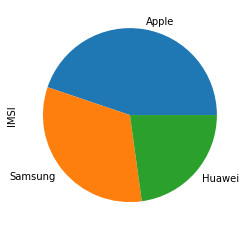

In [14]:
y=df[['Handset Manufacturer','IMSI']].groupby(['Handset Manufacturer'])['IMSI'].nunique().nlargest(3).plot(kind='pie')


## The top 5 handsets per top 3 handset manufacturer

<AxesSubplot:ylabel='Handset Type'>

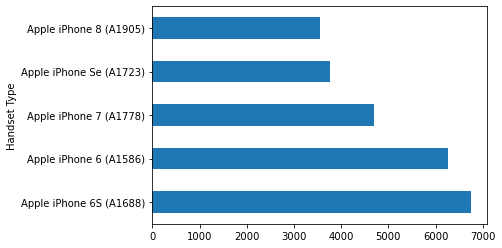

In [15]:
#Apple
df[df['Handset Manufacturer']=='Apple'].groupby(['Handset Type'])['IMSI'].nunique().nlargest(5).plot(kind='barh')

In [16]:
#Samsung
df[df['Handset Manufacturer']=='Samsung'].groupby(['Handset Type'])['IMSI'].nunique().nlargest(5)

Handset Type
Samsung Galaxy S8 (Sm-G950F)    3245
Samsung Galaxy J5 (Sm-J530)     2748
Samsung Galaxy A5 Sm-A520F      2708
Samsung Galaxy J3 (Sm-J330)     2589
Samsung Galaxy S7 (Sm-G930X)    2292
Name: IMSI, dtype: int64

In [17]:
#Huawei
df[df['Handset Manufacturer']=='Huawei'].groupby(['Handset Type'])['IMSI'].nunique().nlargest(5)

Handset Type
Huawei B528S-23A                  10616
Huawei P20 Lite Huawei Nova 3E     1531
Huawei E5180                       1182
Huawei P20                         1109
Huawei Y6 2018                      757
Name: IMSI, dtype: int64

## Task 1.1 
- Your employer wants to have an overview of the users’ behavior on those applications.

  Aggregate per user the following information in the column  

     - number of xDR sessions
     - Session duration
     - the total download (DL) and upload (UL) data
     - the total data volume (in Bytes) during this session for each  application


## Number of sessions per user

In [18]:
# Aggregating per user the number of xDR session column
df_session_count = df.groupby(['MSISDN/Number'])['Bearer Id'].agg(['count'])
df_session_count.head(10)

,count
MSISDN/Number,
3197020876596,1
33601001722,1
33601001754,1
33601002511,1
33601007832,1
33601008617,2
33601010682,2
33601011634,2
33601011959,1


## Session Duration

In [19]:
# Aggregating per user the Session duration column
df_session_duration = df.groupby(['MSISDN/Number'])['Dur. (ms)'].agg(['sum'])
df_session_duration.head(10)

,sum
MSISDN/Number,
3197020876596,877385.0
33601001722,116720.0
33601001754,181230.0
33601002511,134969.0
33601007832,49878.0
33601008617,37104.0
33601010682,253983.0
33601011634,128360.0
33601011959,86399.0


## Total Data Uploaded and Downloaded

In [20]:
df_total_data = df.groupby(['MSISDN/Number'])['Total UL (Bytes)', 'Total DL (Bytes)'].sum()
df_total_data.head(10)

,Total UL (Bytes),Total DL (Bytes)
MSISDN/Number,,
3197020876596,37295915.0,1.948281e+08
33601001722,36053108.0,8.426375e+08
33601001754,36104459.0,1.207552e+08
33601002511,39306820.0,5.566597e+08
33601007832,20327526.0,4.019932e+08
33601008617,94280527.0,1.363130e+09
33601010682,60009249.0,5.552080e+08
33601011634,101681858.0,5.530412e+08
33601011959,38575279.0,2.940851e+08


## Total data volume (in Bytes) during this session for each application


In [114]:
# adding two columns and forming a new column
def adding_columns(name,column1,column2):
    df[name] = df_clean[column1] + df_clean[column2]
    return df
adding_columns(name='Total_UL_DL',column1='Total UL (Bytes)',column2='Total DL (Bytes)')
adding_columns(name='Avg_RTT_UL_DL',column1='Avg RTT DL (ms)',column2='Avg RTT UL (ms)')
adding_columns(name='TCP_UL_DL_Retrans. Vol_(Bytes)',column1='TCP DL Retrans. Vol (Bytes)',column2='TCP UL Retrans. Vol (Bytes)')
adding_columns(name='Avg_ Bearer_TP DL_UL _(kbps)',column1='Avg Bearer TP DL (kbps)',column2='Avg Bearer TP UL (kbps)')
adding_columns(name='Social_Media_UL_DL',column1='Social Media DL (Bytes)',column2='Social Media UL (Bytes)')
adding_columns(name='Google_UL_DL',column1='Google DL (Bytes)',column2='Google UL (Bytes)')
adding_columns(name='Email_UL_DL',column1='Email DL (Bytes)',column2='Email DL (Bytes)')
adding_columns(name='Youtube_UL_DL',column1='Youtube DL (Bytes)',column2='Youtube DL (Bytes)')
adding_columns(name='Netflix_UL_DL',column1='Netflix DL (Bytes)',column2='Netflix UL (Bytes)')
adding_columns(name='Gaming_UL_DL',column1='Gaming DL (Bytes)',column2='Gaming UL (Bytes)')
adding_columns(name='Other_UL_DL',column1='Other DL (Bytes)',column2='Other UL (Bytes)')


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),k,Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total_UL_DL,Avg RTT_UL_DL,TCP UL_DL Retrans. Vol (Bytes),Avg_ Bearer_TP DL_UL _(kbps),Social_Media_UL_DL,Google_UL_DL,Email_UL_DL,Youtube_UL_DL,Netflix_UL_DL,Gaming_UL_DL,Other_UL_DL,Decile_rank
0,13114483460844900352,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,208201448079117,33664962239,35521209507511,9.16456699548519E+015,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0,345629377.0,47.0,NaN,67.0,1570185.0,2905912.0,7127084.0,31709222.0,17855187.0,292426453.0,180558843.0,4
1,13114483482878900224,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,1365104.0,208201909211140,33681854413,35794009006359,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0,707185356.0,70.0,NaN,42.0,1933278.0,4414096.0,1258092.0,40494790.0,35565545.0,609920783.0,541959383.0,4
2,13114483484080500736,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,1361762.0,208200314458056,33760627129,35281510359387,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0,307690973.0,NaN,NaN,15.0,1726277.0,10229119.0,5380302.0,39451322.0,23751202.0,229980251.0,414908351.0,4
3,13114483485442799616,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,1321509.0,208201402342131,33750343200,35356610164913,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0,889352748.0,NaN,NaN,88.0,657493.0,11811761.0,2879508.0,42776244.0,15092588.0,810387875.0,761837216.0,4
4,13114483499480700928,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,1089009.0,208201401415120,33699795932,35407009745539,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0,607681403.0,NaN,NaN,15.0,912788.0,7748843.0,3872992.0,30518760.0,17539799.0,531237049.0,564619822.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [22]:
# Aggregating per user the Total_UL_DL column

user_grp = df.groupby(['MSISDN/Number'])
user_grp['Total_UL_DL'].agg(['min','max','mean','median','sum']).head(10)

,min,max,mean,median,sum
MSISDN/Number,,,,,
3197020876596,232123971.0,232123971.0,232123971.0,232123971.0,2.321240e+08
33601001722,878690574.0,878690574.0,878690574.0,878690574.0,8.786906e+08
33601001754,156859643.0,156859643.0,156859643.0,156859643.0,1.568596e+08
33601002511,595966483.0,595966483.0,595966483.0,595966483.0,5.959665e+08
33601007832,422320698.0,422320698.0,422320698.0,422320698.0,4.223207e+08
33601008617,585578364.0,871832580.0,728705472.0,728705472.0,1.457411e+09
33601010682,194367933.0,420849288.0,307608610.5,307608610.5,6.152172e+08
33601011634,199050991.0,455672075.0,327361533.0,327361533.0,6.547231e+08
33601011959,332660357.0,332660357.0,332660357.0,332660357.0,3.326604e+08


In [23]:
# Aggregating per user the Social_Media_UL_DL column

user_grp = df.groupby(['MSISDN/Number'])
user_grp['Social_Media_UL_DL'].agg(['min','max','mean','median','sum']).head(10)

,min,max,mean,median,sum
MSISDN/Number,,,,,
3197020876596,715224.0,715224.0,715224.0,715224.0,715224.0
33601001722,2232135.0,2232135.0,2232135.0,2232135.0,2232135.0
33601001754,2660565.0,2660565.0,2660565.0,2660565.0,2660565.0
33601002511,3195623.0,3195623.0,3195623.0,3195623.0,3195623.0
33601007832,280294.0,280294.0,280294.0,280294.0,280294.0
33601008617,1388485.0,1524057.0,1456271.0,1456271.0,2912542.0
33601010682,993654.0,2799258.0,1896456.0,1896456.0,3792912.0
33601011634,414264.0,2355363.0,1384813.5,1384813.5,2769627.0
33601011959,1782692.0,1782692.0,1782692.0,1782692.0,1782692.0


In [24]:
# Aggregating per user the Google_UL_DL column

user_grp = df.groupby(['MSISDN/Number'])
user_grp['Google_UL_DL'].agg(['min','max','mean','median','sum']).head(10)

,min,max,mean,median,sum
MSISDN/Number,,,,,
3197020876596,10438660.0,10438660.0,10438660.0,10438660.0,10438660.0
33601001722,4389005.0,4389005.0,4389005.0,4389005.0,4389005.0
33601001754,5334863.0,5334863.0,5334863.0,5334863.0,5334863.0
33601002511,3443126.0,3443126.0,3443126.0,3443126.0,3443126.0
33601007832,9678493.0,9678493.0,9678493.0,9678493.0,9678493.0
33601008617,8328981.0,10170635.0,9249808.0,9249808.0,18499616.0
33601010682,2417450.0,12845684.0,7631567.0,7631567.0,15263134.0
33601011634,3869764.0,6326639.0,5098201.5,5098201.5,10196403.0
33601011959,12023614.0,12023614.0,12023614.0,12023614.0,12023614.0


In [25]:
# Aggregating per user the Email_UL_DL column

user_grp = df.groupby(['MSISDN/Number'])
user_grp['Email_UL_DL'].agg(['min','max','mean','median','sum']).head(10)

,min,max,mean,median,sum
MSISDN/Number,,,,,
3197020876596,1684558.0,1684558.0,1684558.0,1684558.0,1684558.0
33601001722,1674800.0,1674800.0,1674800.0,1674800.0,1674800.0
33601001754,5657642.0,5657642.0,5657642.0,5657642.0,5657642.0
33601002511,4873000.0,4873000.0,4873000.0,4873000.0,4873000.0
33601007832,4357236.0,4357236.0,4357236.0,4357236.0,4357236.0
33601008617,1959718.0,2535898.0,2247808.0,2247808.0,4495616.0
33601010682,6278782.0,6748886.0,6513834.0,6513834.0,13027668.0
33601011634,627002.0,845890.0,736446.0,736446.0,1472892.0
33601011959,2561116.0,2561116.0,2561116.0,2561116.0,2561116.0


In [26]:
# Aggregating per user the Youtube_UL_DL column

user_grp = df.groupby(['MSISDN/Number'])
user_grp['Youtube_UL_DL'].agg(['min','max','mean','median','sum']).head(10)

,min,max,mean,median,sum
MSISDN/Number,,,,,
3197020876596,19679778.0,19679778.0,19679778.0,19679778.0,19679778.0
33601001722,29800402.0,29800402.0,29800402.0,29800402.0,29800402.0
33601001754,10648502.0,10648502.0,10648502.0,10648502.0,10648502.0
33601002511,4274544.0,4274544.0,4274544.0,4274544.0,4274544.0
33601007832,8786246.0,8786246.0,8786246.0,8786246.0,8786246.0
33601008617,4624676.0,16055266.0,10339971.0,10339971.0,20679942.0
33601010682,2706208.0,21633276.0,12169742.0,12169742.0,24339484.0
33601011634,2303450.0,3678188.0,2990819.0,2990819.0,5981638.0
33601011959,10200206.0,10200206.0,10200206.0,10200206.0,10200206.0


In [27]:
# Aggregating per user the Netflix_UL_DL column

user_grp = df.groupby(['MSISDN/Number'])
user_grp['Netflix_UL_DL'].agg(['min','max','mean','median','sum']).head(10)

,min,max,mean,median,sum
MSISDN/Number,,,,,
3197020876596,26592300.0,26592300.0,26592300.0,26592300.0,26592300.0
33601001722,27180981.0,27180981.0,27180981.0,27180981.0,27180981.0
33601001754,11221763.0,11221763.0,11221763.0,11221763.0,11221763.0
33601002511,19353900.0,19353900.0,19353900.0,19353900.0,19353900.0
33601007832,1942092.0,1942092.0,1942092.0,1942092.0,1942092.0
33601008617,21973110.0,27228614.0,24600862.0,24600862.0,49201724.0
33601010682,8579907.0,21735594.0,15157750.5,15157750.5,30315501.0
33601011634,14074942.0,31737455.0,22906198.5,22906198.5,45812397.0
33601011959,15292840.0,15292840.0,15292840.0,15292840.0,15292840.0


In [28]:
# Aggregating per user the Gaming_UL_DL column

user_grp = df.groupby(['MSISDN/Number'])
user_grp['Gaming_UL_DL'].agg(['min','max','mean','median','sum']).head(10)

,min,max,mean,median,sum
MSISDN/Number,,,,,
3197020876596,178048738.0,178048738.0,178048738.0,178048738.0,1.780487e+08
33601001722,812458661.0,812458661.0,812458661.0,812458661.0,8.124587e+08
33601001754,119750078.0,119750078.0,119750078.0,119750078.0,1.197501e+08
33601002511,538827713.0,538827713.0,538827713.0,538827713.0,5.388277e+08
33601007832,391126127.0,391126127.0,391126127.0,391126127.0,3.911261e+08
33601008617,512232631.0,802565189.0,657398910.0,657398910.0,1.314798e+09
33601010682,126130650.0,385505137.0,255817893.5,255817893.5,5.116358e+08
33601011634,169429055.0,379032002.0,274230528.5,274230528.5,5.484611e+08
33601011959,282364397.0,282364397.0,282364397.0,282364397.0,2.823644e+08


In [29]:
# Aggregating per user the Other_UL_DL column

user_grp = df.groupby(['MSISDN/Number'])
user_grp['Other_UL_DL'].agg(['min','max','mean','median','sum']).head(10)

,min,max,mean,median,sum
MSISDN/Number,,,,,
3197020876596,470526473.0,470526473.0,470526473.0,470526473.0,4.705265e+08
33601001722,386570872.0,386570872.0,386570872.0,386570872.0,3.865709e+08
33601001754,281710071.0,281710071.0,281710071.0,281710071.0,2.817101e+08
33601002511,501693672.0,501693672.0,501693672.0,501693672.0,5.016937e+08
33601007832,35279702.0,35279702.0,35279702.0,35279702.0,3.527970e+07
33601008617,85988660.0,718815824.0,402402242.0,402402242.0,8.048045e+08
33601010682,212253545.0,280119232.0,246186388.5,246186388.5,4.923728e+08
33601011634,16461170.0,208427543.0,112444356.5,112444356.5,2.248887e+08
33601011959,178201537.0,178201537.0,178201537.0,178201537.0,1.782015e+08


## Exracting the important variables from the Dataset

In [30]:
df.isnull().sum()

Bearer Id                             0
Start                                 0
Start ms                              0
End                                   0
End ms                                0
Dur. (ms)                             0
IMSI                                  0
MSISDN/Number                         0
IMEI                                  0
Last Location Name                    0
Avg RTT DL (ms)                   27644
Avg RTT UL (ms)                   27625
Avg Bearer TP DL (kbps)               0
Avg Bearer TP UL (kbps)               0
TCP DL Retrans. Vol (Bytes)       87796
TCP UL Retrans. Vol (Bytes)       96192
DL TP < 50 Kbps (%)                 720
50 Kbps < DL TP < 250 Kbps (%)      720
250 Kbps < DL TP < 1 Mbps (%)       720
DL TP > 1 Mbps (%)                  720
UL TP < 10 Kbps (%)                 767
10 Kbps < UL TP < 50 Kbps (%)       767
50 Kbps < UL TP < 300 Kbps (%)      767
UL TP > 300 Kbps (%)                767
HTTP DL (Bytes)                   81171


In [31]:
Skewness = df.skew(axis=0)
Skewness

Bearer Id                                NaN
Start ms                            0.000664
End ms                             -0.000751
Dur. (ms)                           3.963937
IMSI                             -269.730099
MSISDN/Number                     332.155856
IMEI                                1.069028
Avg RTT DL (ms)                    64.491396
Avg RTT UL (ms)                    28.559090
Avg Bearer TP DL (kbps)             2.590258
Avg Bearer TP UL (kbps)             4.500632
TCP DL Retrans. Vol (Bytes)        15.906851
TCP UL Retrans. Vol (Bytes)        83.638099
DL TP < 50 Kbps (%)                -2.300735
50 Kbps < DL TP < 250 Kbps (%)      3.277965
250 Kbps < DL TP < 1 Mbps (%)       4.575366
DL TP > 1 Mbps (%)                  5.363229
UL TP < 10 Kbps (%)                -8.997575
10 Kbps < UL TP < 50 Kbps (%)      10.961280
50 Kbps < UL TP < 300 Kbps (%)     21.885877
UL TP > 300 Kbps (%)               36.111207
HTTP DL (Bytes)                    38.740864
HTTP UL (B

In [32]:
def fix_missing_median(df, col):
    df[col] = df[col].fillna(df[col].median())
    return df[col]
df['Avg RTT_UL_DL']= fix_missing_median(df,'Avg RTT_UL_DL')
df['TCP UL_DL Retrans. Vol (Bytes)']= fix_missing_median(df,'TCP UL_DL Retrans. Vol (Bytes)')
df['Avg_ Bearer_TP DL_UL _(kbps)']= fix_missing_median(df,'Avg_ Bearer_TP DL_UL _(kbps)')

In [33]:
# fill missing with ffill method or bfill for features

# # fill 'Dur. (ms)' column with mode since the skewness of the column is higher
def fix_missing_mode(df, col):
    df[col] = df[col].fillna(df[col].mode()[0])
    return df[col]
df['Dur. (ms)'] = fix_missing_mode(df_clean, 'Dur. (ms)')


In [34]:
# fill missing value with mean for column that has no skew number
def fix_missing_mean(df, col):
    df[col] = df[col].fillna(df[col].mean())
    return df[col]

df['Total_UL_DL'] = fix_missing_mode(df, 'Total_UL_DL')
df['Social_Media_UL_DL'] = fix_missing_median(df, 'Social_Media_UL_DL')
df['Social_Media_UL_DL'] = fix_missing_median(df, 'Social_Media_UL_DL')


In [35]:
# which column(s) has missing values
df.isna().sum().head(20)

Bearer Id                             0
Start                                 0
Start ms                              0
End                                   0
End ms                                0
Dur. (ms)                             0
IMSI                                  0
MSISDN/Number                         0
IMEI                                  0
Last Location Name                    0
Avg RTT DL (ms)                   27644
Avg RTT UL (ms)                   27625
Avg Bearer TP DL (kbps)               0
Avg Bearer TP UL (kbps)               0
TCP DL Retrans. Vol (Bytes)       87796
TCP UL Retrans. Vol (Bytes)       96192
DL TP < 50 Kbps (%)                 720
50 Kbps < DL TP < 250 Kbps (%)      720
250 Kbps < DL TP < 1 Mbps (%)       720
DL TP > 1 Mbps (%)                  720
dtype: int64

In [36]:
quantity = ['MSISDN/Number','Dur. (ms)','Total_UL_DL','Social_Media_UL_DL','Google_UL_DL','Email_UL_DL','Youtube_UL_DL','Netflix_UL_DL','Gaming_UL_DL','Other_UL_DL','TCP UL_DL Retrans. Vol (Bytes)','Avg RTT_UL_DL','Avg_ Bearer_TP DL_UL _(kbps)']

In [37]:
df_quantity = df[quantity]
df_quantity.head()

,MSISDN/Number,Dur. (ms),Total_UL_DL,Social_Media_UL_DL,Google_UL_DL,Email_UL_DL,Youtube_UL_DL,Netflix_UL_DL,Gaming_UL_DL,Other_UL_DL,TCP UL_DL Retrans. Vol (Bytes),Avg RTT_UL_DL,Avg_ Bearer_TP DL_UL _(kbps)
0,33664962239,1823652.0,345629377.0,1570185.0,2905912.0,7127084.0,31709222.0,17855187.0,292426453.0,180558843.0,1199819.5,47.0,67.0
1,33681854413,1365104.0,707185356.0,1933278.0,4414096.0,1258092.0,40494790.0,35565545.0,609920783.0,541959383.0,1199819.5,70.0,42.0
2,33760627129,1361762.0,307690973.0,1726277.0,10229119.0,5380302.0,39451322.0,23751202.0,229980251.0,414908351.0,1199819.5,54.0,15.0
3,33750343200,1321509.0,889352748.0,657493.0,11811761.0,2879508.0,42776244.0,15092588.0,810387875.0,761837216.0,1199819.5,54.0,88.0
4,33699795932,1089009.0,607681403.0,912788.0,7748843.0,3872992.0,30518760.0,17539799.0,531237049.0,564619822.0,1199819.5,54.0,15.0


In [38]:
#Describing all  relevant variables 
relV = df_quantity.head(10).groupby(['MSISDN/Number'])
relV = relV['Dur. (ms)'].describe().head(10)
relV['MSISDN/Number'] = db['MSISDN/Number']
relV.to_csv('processed.csv', index=False)
print('File Successfully Saved.!!!')

File Successfully Saved.!!!


## Task 1.2 

- Conduct an exploratory data analysis on those data & communicate useful insights. Ensure that you identify and treat all missing values and outliers in the dataset by replacing by the mean of the corresponding column.


###  Non-Graphical Univariate Analysis

- Conduct a Non-Graphical Univariate Analysis by computing dispersion parameters for each quantitative variable and provide useful interpretation. 

In [39]:
#non graphical univariate analysis for session duration 

session_duration = user_grp['Dur. (ms)'].agg(['min','max','mean']).head(10)
session_duration

,min,max,mean
MSISDN/Number,,,
3197020876596,877385.0,877385.0,877385.0
33601001722,116720.0,116720.0,116720.0
33601001754,181230.0,181230.0,181230.0
33601002511,134969.0,134969.0,134969.0
33601007832,49878.0,49878.0,49878.0
33601008617,18549.0,18555.0,18552.0
33601010682,125895.0,128088.0,126991.5
33601011634,64180.0,64180.0,64180.0
33601011959,86399.0,86399.0,86399.0


In [40]:
def fix_outlier(df, column):
    df[column] = np.where(df[column] > df[column].quantile(0.95), df[column].median(),df[column])
    
    return df[column]

In [41]:
df_quantity['Dur. (ms)']= fix_outlier(df_quantity, column='Dur. (ms)')
df_quantity['Total_UL_DL']= fix_outlier(df_quantity, column='Total_UL_DL')
df_quantity['Social_Media_UL_DL']= fix_outlier(df_quantity, column='Social_Media_UL_DL')
df_quantity['Google_UL_DL']= fix_outlier(df_quantity, column='Google_UL_DL')
df_quantity['Email_UL_DL']= fix_outlier(df_quantity, column='Email_UL_DL')
df_quantity['Youtube_UL_DL']= fix_outlier(df_quantity, column='Youtube_UL_DL')
df_quantity['Netflix_UL_DL']= fix_outlier(df_quantity, column='Netflix_UL_DL')
df_quantity['Gaming_UL_DL']= fix_outlier(df_quantity, column='Gaming_UL_DL')
df_quantity['Other_UL_DL']= fix_outlier(df_quantity, column='Other_UL_DL')
df_quantity['Avg RTT_UL_DL']= fix_outlier(df_quantity, column='Avg RTT_UL_DL')
df_quantity['TCP UL_DL Retrans. Vol (Bytes)']= fix_outlier(df_quantity, column='TCP UL_DL Retrans. Vol (Bytes)')
df_quantity['TCP UL_DL Retrans. Vol (Bytes)']= fix_outlier(df_quantity, column='TCP UL_DL Retrans. Vol (Bytes)')
df_quantity['Avg_ Bearer_TP DL_UL _(kbps)']= fix_outlier(df_quantity, column='Avg_ Bearer_TP DL_UL _(kbps)')



In [42]:
df_quantity.describe()

,Dur. (ms),Total_UL_DL,Social_Media_UL_DL,Google_UL_DL,Email_UL_DL,Youtube_UL_DL,Netflix_UL_DL,Gaming_UL_DL,Other_UL_DL,TCP UL_DL Retrans. Vol (Bytes),Avg RTT_UL_DL,Avg_ Bearer_TP DL_UL _(kbps)
count,148935.000000,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05,148935.000000,148935.000000
mean,91894.497626,4.756267e+08,1.742915e+06,7.492501e+06,3.413228e+06,2.216104e+07,2.173450e+07,4.103399e+08,4.093832e+08,1.128385e+06,64.203921,10115.479128
std,48771.280876,2.262090e+08,9.594093e+05,3.203829e+06,1.918744e+06,1.243149e+07,8.297438e+06,2.260802e+08,2.252071e+08,5.354704e+05,41.417976,17653.918687
min,7142.000000,2.895611e+07,1.563000e+03,4.033000e+04,2.800000e+01,1.060000e+02,9.843200e+04,3.063580e+05,1.490450e+05,8.600000e+01,0.000000,0.000000
25%,57883.500000,2.844641e+08,9.321130e+05,4.944102e+06,1.785304e+06,1.166266e+07,1.597990e+07,2.187082e+08,2.185946e+08,1.199820e+06,40.000000,90.000000
50%,86399.000000,4.968460e+08,1.825624e+06,7.814744e+06,3.587170e+06,2.323277e+07,2.263279e+07,4.315884e+08,4.300767e+08,1.199820e+06,54.000000,125.000000
75%,116379.500000,6.641707e+08,2.546754e+06,1.012070e+07,5.022891e+06,3.258006e+07,2.774478e+07,5.990176e+08,5.972190e+08,1.199820e+06,69.000000,14090.500000
max,241762.000000,8.752990e+08,3.435845e+06,1.340223e+07,6.813444e+06,4.415394e+07,3.808696e+07,8.098652e+08,8.089473e+08,4.110887e+06,270.000000,71127.000000


### Graphical Univariate Analysis 
- Conduct a Graphical Univariate Analysis by identifying the most suitable plotting options for each variable and interpret your findings.


In [43]:
def plot_univariate(df, col1, col2):
    plt.figure(figsize = (12, 8))

    plt.subplot(2, 2, 1)
    plt.hist(df[col1], bins = 20, color = 'lavender', edgecolor = 'gray', linewidth = 0.5)
    plt.title(f'Histogram of {col1}', size=14)

    plt.subplot(2, 2, 2)
    plt.boxplot(df[col1])
    plt.title(f'Boxplot of {col1}', size=14)

    plt.subplot(2, 2, 3)
    plt.hist(df[col2], bins=20, color='lavender', edgecolor='gray', linewidth=0.5)
    plt.title(f'Histogram of {col2}', size=14)

    plt.subplot(2, 2, 4)
    plt.boxplot(df[col2])
    plt.title(f'Boxplot of {col2}', size=14)

    
    

    plt.show()

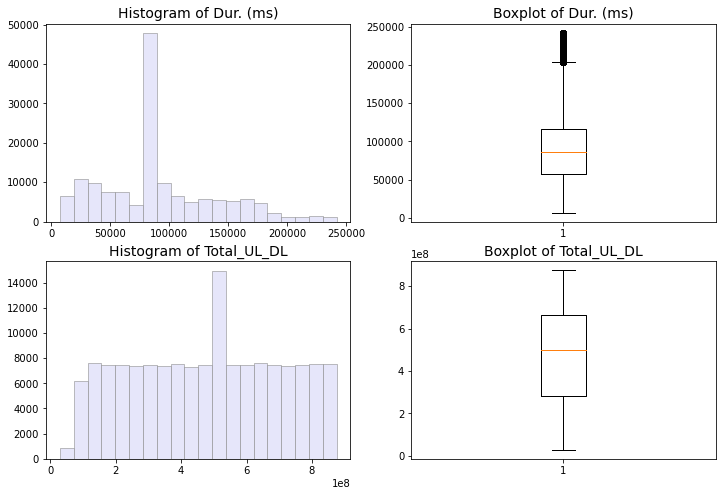

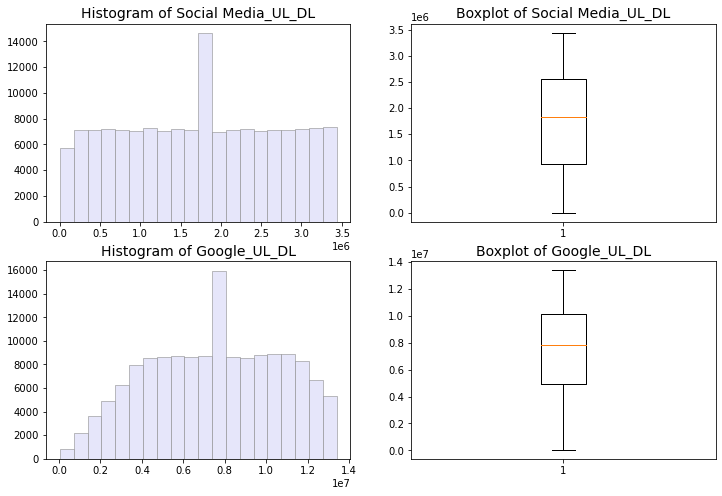

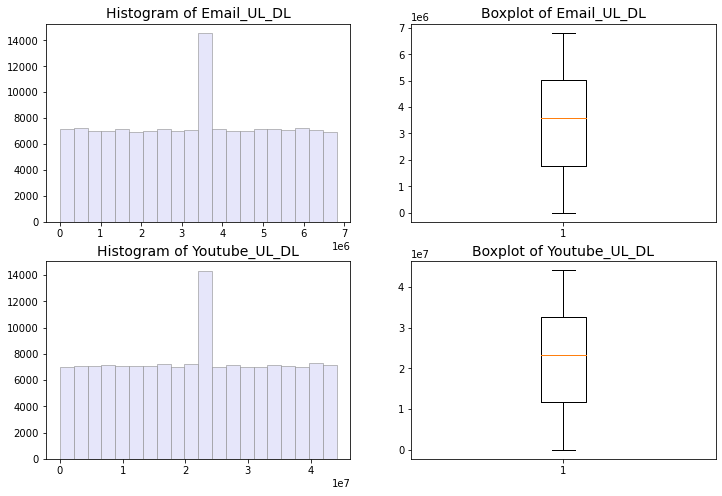

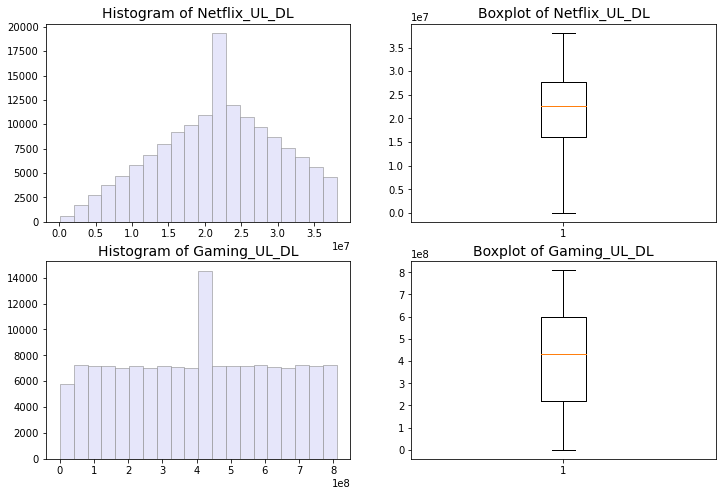

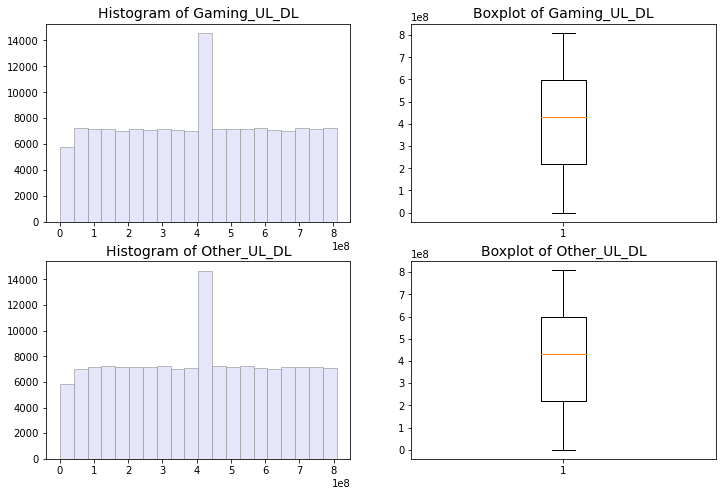

In [44]:
plot_univariate(df_quantity, 'Dur. (ms)','Total_UL_DL')
plot_univariate(df_quantity, 'Social_Media_UL_DL','Google_UL_DL')
plot_univariate(df_quantity, 'Email_UL_DL','Youtube_UL_DL')
plot_univariate(df_quantity, 'Netflix_UL_DL','Gaming_UL_DL')
plot_univariate(df_quantity, 'Gaming_UL_DL','Other_UL_DL')

### Bivariate Analysis 
-  explore the relationship between each application & the total DL+UL data using appropriate methods and interpret your findings. 


In [45]:

def plot_scatter(df: pd.DataFrame, x_col: str, y_col:str, title: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

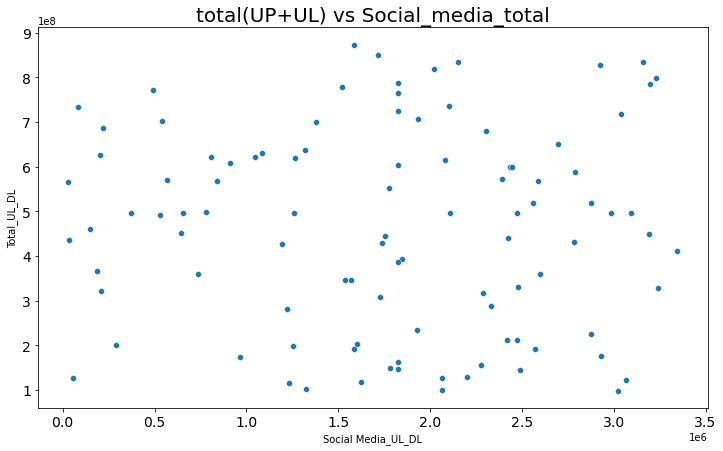

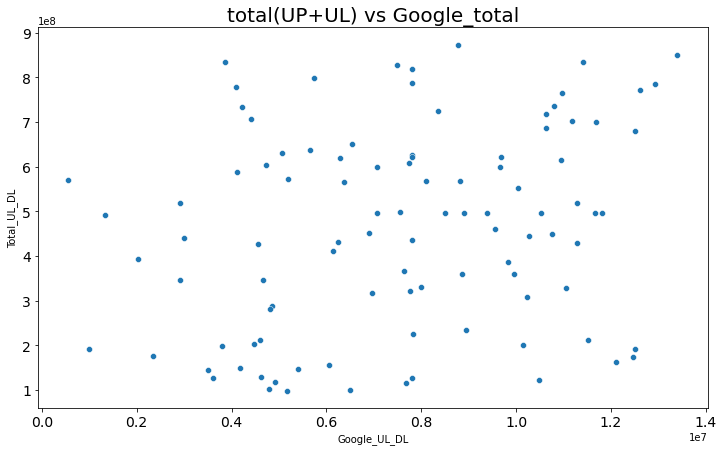

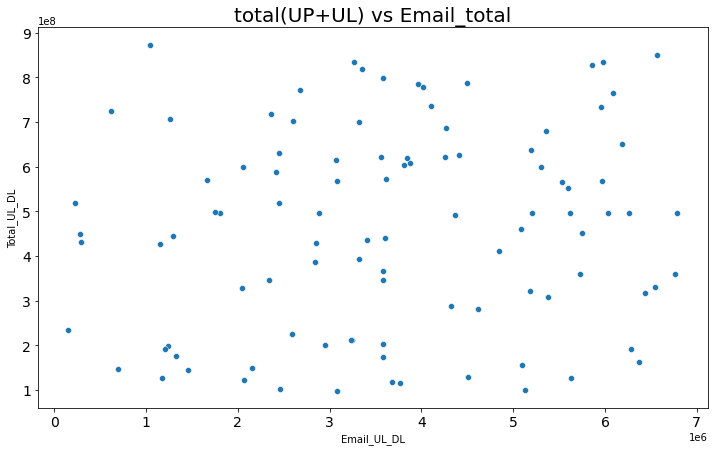

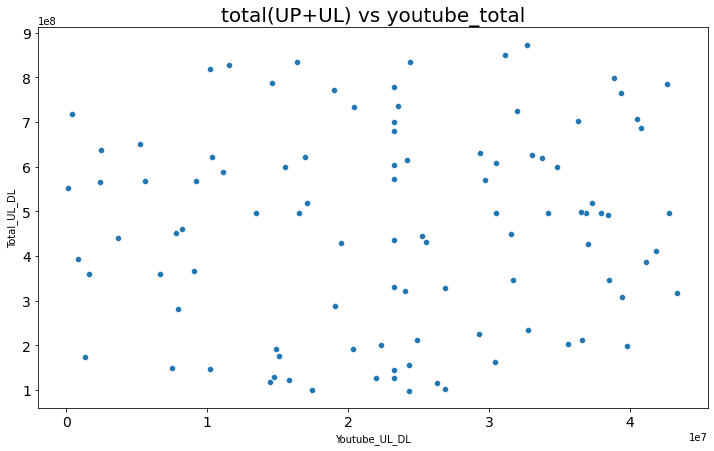

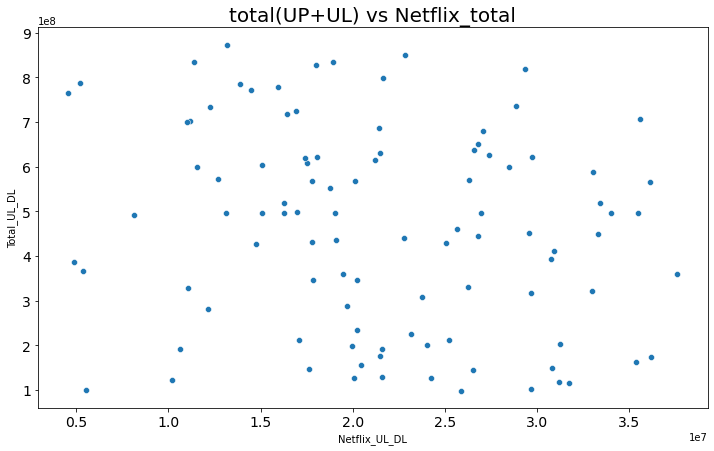

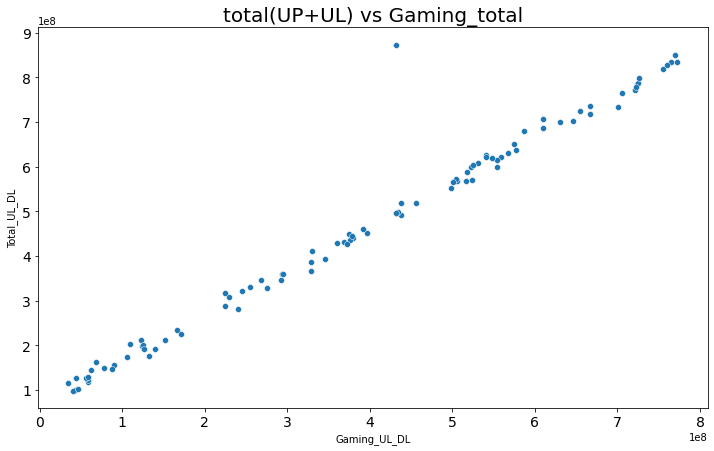

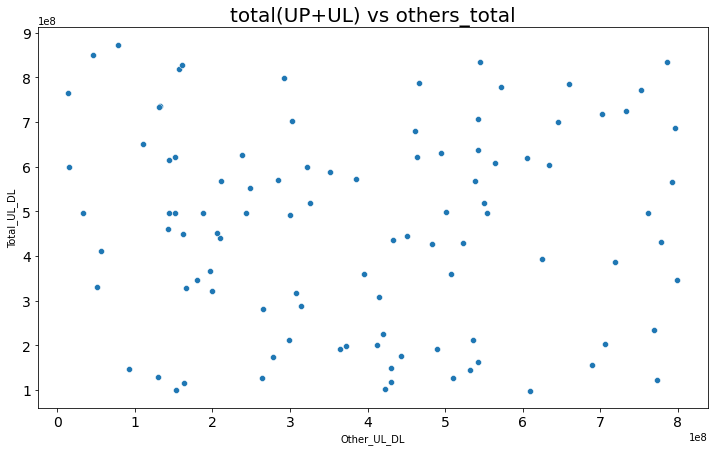

In [46]:
plot_scatter(df_quantity.head(100), x_col="Social_Media_UL_DL", y_col="Total_UL_DL", title="total(UP+UL) vs Social_media_total")
plot_scatter(df_quantity.head(100), x_col="Google_UL_DL", y_col="Total_UL_DL", title="total(UP+UL) vs Google_total")
plot_scatter(df_quantity.head(100), x_col="Email_UL_DL", y_col="Total_UL_DL", title="total(UP+UL) vs Email_total")
plot_scatter(df_quantity.head(100), x_col="Youtube_UL_DL", y_col="Total_UL_DL", title="total(UP+UL) vs youtube_total")
plot_scatter(df_quantity.head(100), x_col="Netflix_UL_DL", y_col="Total_UL_DL", title="total(UP+UL) vs Netflix_total")
plot_scatter(df_quantity.head(100), x_col="Gaming_UL_DL", y_col="Total_UL_DL", title="total(UP+UL) vs Gaming_total")
plot_scatter(df_quantity.head(100), x_col="Other_UL_DL", y_col="Total_UL_DL", title="total(UP+UL) vs others_total")






### Variable transformations 

- Variable transformations – segment the users into top five decile classes based on the total duration for all sessions and compute the total data (DL+UL) per decile class. 


In [47]:
df['Decile_rank']= pd.qcut(df['Dur. (ms)'],5, labels=False)
df[['Dur. (ms)','Decile_rank']]

,Dur. (ms),Decile_rank
0,1823652.0,4
1,1365104.0,4
2,1361762.0,4
3,1321509.0,4
4,1089009.0,4
...,...,...
149995,59587.0,1
149996,81230.0,1
149997,97970.0,3
149998,98249.0,3


In [48]:
df_total_UL_DL= df.groupby(['Decile_rank'])['Total_UL_DL'].agg(['sum'])
df_total_UL_DL

,sum
Decile_rank,
0,1.477281e+13
1,2.329296e+13
2,6.208532e+12
3,1.474316e+13
4,1.481598e+13


In [49]:
correlation=['Social_Media_UL_DL','Google_UL_DL','Email_UL_DL','Youtube_UL_DL','Netflix_UL_DL','Gaming_UL_DL','Other_UL_DL']
df_correlation=df[correlation]
corr=df_correlation.corr()
corr.style.background_gradient(cmap='coolwarm').set_properties(**{'font-size': '0pt'})

,Social_Media_UL_DL,Google_UL_DL,Email_UL_DL,Youtube_UL_DL,Netflix_UL_DL,Gaming_UL_DL,Other_UL_DL
Social_Media_UL_DL,1.000000,-0.001855,0.004987,-0.001214,0.001421,0.001387,0.005849
Google_UL_DL,-0.001855,1.000000,-0.000357,0.002205,-0.001911,-0.000949,-0.001904
Email_UL_DL,0.004987,-0.000357,1.000000,0.001475,0.001106,-0.000009,-0.000161
Youtube_UL_DL,-0.001214,0.002205,0.001475,1.000000,0.002191,-0.001838,0.001860
Netflix_UL_DL,0.001421,-0.001911,0.001106,0.002191,1.000000,-0.003092,-0.008791
Gaming_UL_DL,0.001387,-0.000949,-0.000009,-0.001838,-0.003092,1.000000,-0.002789
Other_UL_DL,0.005849,-0.001904,-0.000161,0.001860,-0.008791,-0.002789,1.000000


## Task 2

### The top 10 customers per engagement metric

In [67]:
# Sessions frequency 

grouped = df.groupby('MSISDN/Number')
sessions_frequency = grouped.agg({"Bearer Id": "count"})
Top = sessions_frequency.sort_values(by='Bearer Id', ascending=False)
Top.head(10)

,Bearer Id
MSISDN/Number,
33626320676,18
33614892860,17
33625779332,17
33659725664,16
33760536639,15
33675877202,15
33667163239,13
33627080969,12
33604515716,12


In [77]:
duration_of_sessions=df.groupby(['MSISDN/Number']).agg({'Dur. (ms)':'sum'})
duration_of_sessions

,Dur. (ms)
MSISDN/Number,
3197020876596,877385.0
33601001722,116720.0
33601001754,181230.0
33601002511,134969.0
33601007832,49878.0
...,...
33789967113,160461.0
33789980299,210389.0
33789996170,8810.0


In [79]:
total_traffic= df.groupby(['MSISDN/Number']).agg({'Total_UL_DL':'sum'})


## Task 2.1

- Aggregate the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric 

- Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement.

- Compute the minimum, maximum, average & total non- normalized metrics for each cluster. Interpret your results visually with accompanying text explaining your findings.

- Aggregate user total traffic per application and derive the top 10 most engaged users per application

- Plot the top 3 most used applications using appropriate charts. 

- Using k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics: 
- What is the optimized value of k (use elbow method for this)?  Interpret your findings. 



In [81]:

joined_df =pd.merge(sessions_frequency,duration_of_sessions, on= 'MSISDN/Number', how='left').merge(total_traffic, on= 'MSISDN/Number', how='left')
joined_df

,Bearer Id,Dur. (ms),Total_UL_DL
MSISDN/Number,,,
3197020876596,1,877385.0,2.321240e+08
33601001722,1,116720.0,8.786906e+08
33601001754,1,181230.0,1.568596e+08
33601002511,1,134969.0,5.959665e+08
33601007832,1,49878.0,4.223207e+08
...,...,...,...
33789967113,1,160461.0,2.081231e+08
33789980299,2,210389.0,1.094693e+09
33789996170,1,8810.0,7.146416e+08


#### Normalizing and standardizing for K means clustering

In [85]:
N_CLUSTERS = 3

cols_to_standardize = ['Bearer Id',  'Dur. (ms)', 'Total_UL_DL']
data_to_standardize = joined_df[cols_to_standardize]

# Create the scaler.
scaler = StandardScaler().fit(data_to_standardize)


In [101]:
# Standardize the data

standardized_data = joined_df.copy()
standardized_columns = scaler.transform(data_to_standardize)
standardized_data[cols_to_standardize] = standardized_columns

# Normalized the data
cols_to_normalize = ['Bearer Id',  'Dur. (ms)', 'Total_UL_DL']
data_to_normalize = standardized_data[cols_to_normalize]

normalized_data= standardized_data.copy()
normalized_columns=normalize(data_to_normalize)
normalized_data[cols_to_normalize]=normalized_columns


print('Sample of data to use:')
print(standardized_data.sample(5))
print('')

# print('Sample of data to use:')
print(normalized_data.sample(5)) 
print('')

model = KMeans(n_clusters=N_CLUSTERS).fit(standardized_data)

joined_df['cluster'] = model.predict(standardized_data)

print('Cluster summary:')
summary = joined_df.groupby(['cluster']).mean()
summary['count'] = joined_df['cluster'].value_counts()
summary = summary.sort_values(by='count', ascending=False)
print(summary)


Sample of data to use:
               Bearer Id  Dur. (ms)  Total_UL_DL  cluster
MSISDN/Number                                            
33668622253    -0.488564  -0.320717    -0.091766        1
33608937457     0.752103  -0.387068     0.906815        0
33660297981     0.752103   0.300684     1.632733        0
33667021727     0.752103  -0.598940     0.544616        0
33661915630    -0.488564  -0.065407    -0.723738        1

               Bearer Id  Dur. (ms)  Total_UL_DL  cluster
MSISDN/Number                                            
33622272727     0.783080  -0.612055    -0.110340        1
33664807084    -0.670327  -0.182301    -0.719325        1
33660395400    -0.520190  -0.241591    -0.819168        1
33663452234    -0.588257   0.745020    -0.314481        1
33698715692     0.676683   0.027394     0.735765        0

Cluster summary:
         Bearer Id      Dur. (ms)   Total_UL_DL  count
cluster                                               
0         1.028052  103124.513938  4

### Per application

In [103]:
Email_traf= df.groupby(['MSISDN/Number']).agg({'Email_UL_DL':'sum'})

Top = Email_traf.sort_values(by='Email_UL_DL', ascending=False)
Top.head(10)

,Email_UL_DL
MSISDN/Number,
33614892860,67214422.0
33626320676,66809570.0
33625779332,63790824.0
33786323068,61753816.0
33659725664,59815294.0
33760536639,52875790.0
33665460546,51885742.0
33675877202,48569446.0
33698792269,48331198.0


In [104]:
Email_traf= df.groupby(['MSISDN/Number']).agg({'Email_UL_DL':'sum'})

Top = Email_traf.sort_values(by='Email_UL_DL', ascending=False)
Top.head(10)

,Email_UL_DL
MSISDN/Number,
33614892860,67214422.0
33626320676,66809570.0
33625779332,63790824.0
33786323068,61753816.0
33659725664,59815294.0
33760536639,52875790.0
33665460546,51885742.0
33675877202,48569446.0
33698792269,48331198.0


In [105]:
Youtube_traf= df.groupby(['MSISDN/Number']).agg({'Youtube_UL_DL':'sum'})

Top = Youtube_traf.sort_values(by='Youtube_UL_DL', ascending=False)
Top.head(10)

,Youtube_UL_DL
MSISDN/Number,
33625779332,475766066.0
33614892860,399646886.0
33760536639,388136596.0
33627080969,374646644.0
33760413819,348491962.0
33698792269,333800658.0
33626320676,328097412.0
33603127838,317953408.0
33675877202,317330470.0


In [109]:
Social_Media= df.groupby(['MSISDN/Number']).agg({'Social_Media_UL_DL':'sum'})

Top = Social_Media.sort_values(by='Social_Media_UL_DL', ascending=False)
Top.head(10)


,Social_Media_UL_DL
MSISDN/Number,
33626320676,43374779.0
33760536639,39783189.0
33659725664,35412358.0
33614892860,28294544.0
33625779332,27135500.0
33667163239,24247850.0
33786323068,23974919.0
33669068942,23800834.0
33603127838,23077825.0


In [110]:
Google_traf= df.groupby(['MSISDN/Number']).agg({'Google_UL_DL':'sum'})

Top = Google_traf.sort_values(by='Google_UL_DL', ascending=False)
Top.head(10)

,Google_UL_DL
MSISDN/Number,
33626320676,152191852.0
33625779332,142307915.0
33614892860,127973787.0
33760536639,123223099.0
33659725664,116516345.0
33786323068,110254484.0
33675877202,109860502.0
33667163239,105032696.0
33761268199,97089988.0


In [111]:
Netflix_traf= df.groupby(['MSISDN/Number']).agg({'Netflix_UL_DL':'sum'})

Top = Netflix_traf.sort_values(by='Netflix_UL_DL', ascending=False)
Top.head(10)

,Netflix_UL_DL
MSISDN/Number,
33659725664,399519079.0
33614892860,361401046.0
33625779332,356980607.0
33760536639,334643269.0
33626320676,328725740.0
33760413819,318347546.0
33667163239,313939488.0
33675877202,309093159.0
33786323068,305939790.0


In [112]:
Gaming_traf= df.groupby(['MSISDN/Number']).agg({'Gaming_UL_DL':'sum'})

Top = Gaming_traf.sort_values(by='Gaming_UL_DL', ascending=False)
Top.head(10)

,Gaming_UL_DL
MSISDN/Number,
33614892860,7.749432e+09
33760536639,7.461045e+09
33625779332,7.326673e+09
33675877202,6.970568e+09
33626320676,6.887572e+09
33659725664,6.725559e+09
33666464084,6.646303e+09
33760413819,6.268620e+09
33664712899,6.103856e+09


In [113]:
Other_traf= df.groupby(['MSISDN/Number']).agg({'Other_UL_DL':'sum'})

Top = Other_traf.sort_values(by='Other_UL_DL', ascending=False)
Top.head(10)

,Other_UL_DL
MSISDN/Number,
33626320676,8.167878e+09
33614892860,7.639264e+09
33675877202,6.798515e+09
33625779332,6.354583e+09
33603127838,6.326671e+09
33659725664,6.317415e+09
33626948251,5.305448e+09
33627080969,5.117791e+09
33761268199,5.077779e+09


### Top 3 most used application

In [122]:

def percentage(percent,column_name,column_name1):
    df[percent] = (df[column_name].sum() / df[column_name1].sum())* 100
    return df[percent]

percentage(percent='Email_per', column_name='Email_UL_DL',column_name1='Total_UL_DL')    
percentage(percent='Youtube_per', column_name='Youtube_UL_DL',column_name1='Total_UL_DL')  
percentage(percent='netflix_per', column_name='Netflix_UL_DL',column_name1='Total_UL_DL')  
percentage(percent='gaming_per', column_name='Gaming_UL_DL',column_name1='Total_UL_DL')  
percentage(percent='other_per', column_name='Other_UL_DL',column_name1='Total_UL_DL')  
percentage(percent='social_per', column_name='Social_Media_UL_DL',column_name1='Total_UL_DL')  
percentage(percent='google_per', column_name='Google_UL_DL',column_name1='Total_UL_DL')  



0         1.574968
1         1.574968
2         1.574968
3         1.574968
4         1.574968
            ...   
149995    1.574968
149996    1.574968
149997    1.574968
149998    1.574968
149999    1.574968
Name: google_per, Length: 148935, dtype: float64

In [ ]:
Email_UL_DL
Youtube_UL_DL
Netflix_UL_DL
Gaming_UL_DL
Other_UL_DL
Social_Media_UL_DL
Google_UL_DL
Total_UL_DL

# Task 3 - Experience Analytics

#### Task 3. 1 
- Aggregate, per customer, the following information (treat missing & outliers by replacing by the mean or the mode of the corresponding variable):

       Average TCP retransmission
       Average RTT
       Handset type



In [50]:
#Average RTT
RTT=df.groupby(['MSISDN/Number'])
RTT['Avg RTT_UL_DL'].agg(['sum']).head(10)

,sum
MSISDN/Number,
3197020876596,54.0
33601001722,46.0
33601001754,31.0
33601002511,54.0
33601007832,84.0
33601008617,119.0
33601010682,78.0
33601011634,53.0
33601011959,52.0


In [151]:
#Average Throughput
AvgTroughput=df.groupby(['MSISDN/Number']).agg({'Avg_ Bearer_TP DL_UL _(kbps)':'sum'})
AvgTroughput.head()


,Avg_ Bearer_TP DL_UL _(kbps)
MSISDN/Number,
3197020876596,1.0
33601001722,76.0
33601001754,99.0
33601002511,97.0
33601007832,248.0


In [152]:
AvgTroughput.tail()

,Avg_ Bearer_TP DL_UL _(kbps)
MSISDN/Number,
33789967113,67.0
33789980299,163079.0
33789996170,10365.0
33789997247,116.0
882397108489451,2.0


In [154]:
#Average TCP retransmission
TCP=df.groupby(['MSISDN/Number']).agg({'TCP UL_DL Retrans. Vol (Bytes)':'sum'}).head(10)
TCP.head()


,TCP UL_DL Retrans. Vol (Bytes)
MSISDN/Number,
3197020876596,0.0
33601001722,0.0
33601001754,0.0
33601002511,0.0
33601007832,0.0


In [155]:
TCP.tail()

,TCP UL_DL Retrans. Vol (Bytes)
MSISDN/Number,
33601008617,9370832.0
33601010682,0.0
33601011634,110232.0
33601011959,0.0
33601014694,0.0


#### Task 3.2
- Compute & list 10 of the top, bottom and most frequent:

            TCP values in the dataset. 
            RTT values in the dataset.
            Throughput values in the dataset.


In [156]:
#TCP values in the dataset.
df['TCP UL_DL Retrans. Vol (Bytes)'].value_counts().idxmax()

2660.0

In [157]:
df['TCP UL_DL Retrans. Vol (Bytes)'].mode()


0    2660.0
dtype: float64

In [158]:
df['Avg RTT_UL_DL'].mode()

0    29.0
dtype: float64

In [159]:
df['Avg_ Bearer_TP DL_UL _(kbps)'].mode()

0    63.0
dtype: float64

### Task 3.3 - Compute & report:

- The distribution of the average throughput  per handset type and provide interpretation for your findings.
- The average TCP retransmission view per handset type and provide interpretation for your findings.


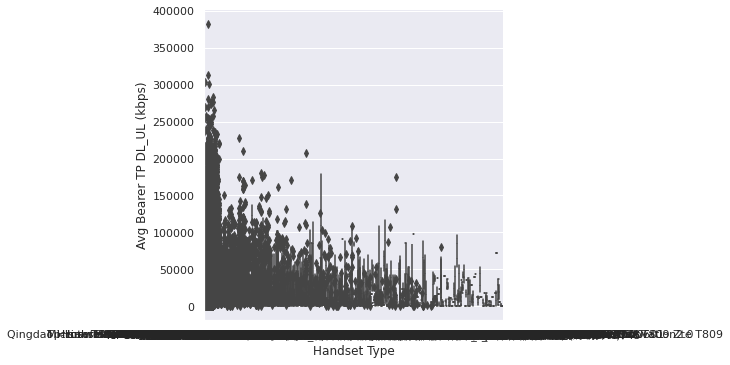

In [160]:
sns.catplot(x="Handset Type", y="Avg_ Bearer_TP DL_UL _(kbps)", kind="box", data=df)

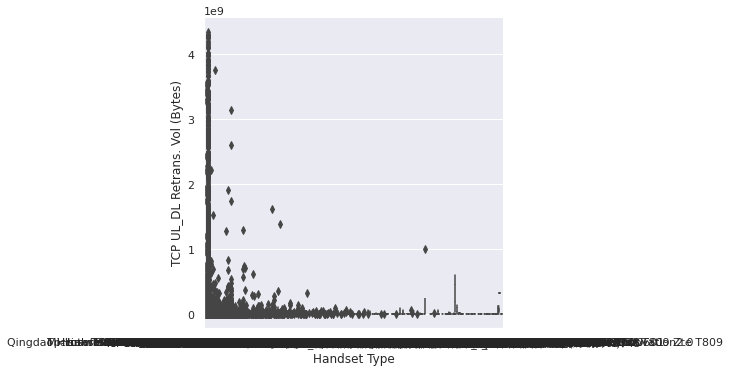

In [161]:
sns.catplot(x="Handset Type", y="TCP UL_DL Retrans. Vol (Bytes)", kind="box", data=df)

In [162]:
s=df.groupby(['MSISDN/Number'])['Total_UL_DL'].agg(['sum'])
s

,sum
MSISDN/Number,
3197020876596,2.321240e+08
33601001722,8.786906e+08
33601001754,1.568596e+08
33601002511,5.959665e+08
33601007832,4.223207e+08
...,...
33789967113,2.081231e+08
33789980299,1.094693e+09
33789996170,7.146416e+08


### Task 3.4 

- Using the experience metrics above, perform a k-means clustering (where k = 3) to segment users into groups of experiences and provide a brief description of each cluster. (The description must define each group based on your understanding of the data)


In [172]:

joined2_df =pd.merge(TCP, AvgTroughput, on= 'MSISDN/Number', how='left')
joined2_df
# pd.merge(sessions_frequency,duration_of_sessions, on= 'MSISDN/Number', how='left').merge(total_traffic, on= 'MSISDN/Number', how='left')
# joined_df

,TCP UL_DL Retrans. Vol (Bytes),Avg_ Bearer_TP DL_UL _(kbps)
MSISDN/Number,,
3197020876596,0.0,1.0
33601001722,0.0,76.0
33601001754,0.0,99.0
33601002511,0.0,97.0
33601007832,0.0,248.0
33601008617,9370832.0,56844.0
33601010682,0.0,7908.0
33601011634,110232.0,42513.0
33601011959,0.0,1247.0


## Task 4 - Satisfaction Analysis


### Task 4. 1 - Write a python program to assign:

- engagement score to each user. Consider the engagement score as the Euclidean distance between the user data point & the less engaged cluster (use the first clustering for this) (Euclidean Distance)

- Experience score to each user. Consider the experience score as the Euclidean distance between the user data point & the worst experience’s cluster. 


In [170]:

#Engagement score to each user
points = joined_df.drop('Bearer Id', axis=1)
kmeans = cluster.KMeans(n_clusters=3, random_state=0).fit(points)
joined_df['cluster'] = kmeans.labels_
centroids = kmeans.cluster_centers_
dists = pd.DataFrame(
    sdist.cdist(points, centroids), 
    columns=['dist_{}'.format(i) for i in range(len(centroids))],
    index=joined_df.index)
df1 = pd.concat([joined_df, dists], axis=1)
print(df1)
df1.describe()

                 Bearer Id  Dur. (ms)   Total_UL_DL  cluster        dist_0  \
MSISDN/Number                                                                
3197020876596            1   877385.0  2.321240e+08        2  5.945764e+08   
33601001722              1   116720.0  8.786906e+08        0  5.199064e+07   
33601001754              1   181230.0  1.568596e+08        2  6.698403e+08   
33601002511              1   134969.0  5.959665e+08        0  2.307335e+08   
33601007832              1    49878.0  4.223207e+08        2  4.043793e+08   
...                    ...        ...           ...      ...           ...   
33789967113              1   160461.0  2.081231e+08        2  6.185769e+08   
33789980299              2   210389.0  1.094693e+09        0  2.679935e+08   
33789996170              1     8810.0  7.146416e+08        0  1.120584e+08   
33789997247              1   140988.0  4.803073e+08        2  3.463926e+08   
882397108489451          1   869844.0  1.391536e+08        2  6.

,Bearer Id,Dur. (ms),Total_UL_DL,cluster,dist_0,dist_1,dist_2
count,106856.000000,1.068560e+05,1.068560e+05,106856.000000,1.068560e+05,1.068560e+05,1.068560e+05
mean,1.393792,1.461672e+05,6.909621e+08,1.013345,3.822843e+08,1.186313e+09,4.164972e+08
std,0.806022,1.863587e+05,4.910559e+08,0.953659,3.367762e+08,3.949377e+08,4.425242e+08
min,1.000000,7.142000e+03,3.324901e+07,0.000000,1.437122e+04,1.751962e+05,1.058732e+04
25%,1.000000,7.130800e+04,3.585499e+08,0.000000,1.348314e+08,9.882390e+08,1.375935e+08
50%,1.000000,1.027400e+05,6.179231e+08,1.000000,3.343415e+08,1.226401e+09,2.851925e+08
75%,2.000000,1.727990e+05,8.574351e+08,2.000000,5.580932e+08,1.484513e+09,5.244703e+08
max,18.000000,1.855375e+07,8.846226e+09,2.000000,8.019533e+09,7.005410e+09,8.513267e+09


In [181]:
#experience score to each user
points = joined2_df.drop('TCP UL_DL Retrans. Vol (Bytes)', axis=1)
kmeans = cluster.KMeans(n_clusters=3, random_state=0).fit(points)
joined2_df['cluster'] = kmeans.labels_
centroids = kmeans.cluster_centers_
dists = pd.DataFrame(
    sdist.cdist(points, centroids), 
    columns=['dist_{}'.format(i) for i in range(len(centroids))],
    index=joined2_df.index)
df2 = pd.concat([joined2_df, dists], axis=1)
print(df2)
df2.describe()

               TCP UL_DL Retrans. Vol (Bytes)  Avg_ Bearer_TP DL_UL _(kbps)  \
MSISDN/Number                                                               
3197020876596                             0.0                         1.0   
33601001722                               0.0                        76.0   
33601001754                               0.0                        99.0   
33601002511                               0.0                        97.0   
33601007832                               0.0                       248.0   
33601008617                         9370832.0                     56844.0   
33601010682                               0.0                      7908.0   
33601011634                          110232.0                     42513.0   
33601011959                               0.0                      1247.0   
33601014694                               0.0                       189.0   

               cluster   dist_0     dist_1   dist_2  
MSISDN/Number      

,TCP UL_DL Retrans. Vol (Bytes),Avg_ Bearer_TP DL_UL _(kbps),cluster,dist_0,dist_1,dist_2
count,1.000000e+01,10.000000,10.000000,10.000000,10.000000,10.000000
mean,9.481064e+05,10922.200000,1.000000,45921.800000,11026.825000,34457.000000
std,2.959647e+06,20842.970202,0.471405,20842.970202,20090.732273,14969.608538
min,0.000000e+00,1.000000,0.000000,0.000000,13.875000,0.000000
25%,0.000000e+00,97.500000,1.000000,50601.250000,1066.625000,36270.250000
50%,0.000000e+00,218.500000,1.000000,56625.500000,1146.625000,42294.500000
75%,0.000000e+00,6242.750000,1.000000,56746.500000,5314.187500,42415.500000
max,9.370832e+06,56844.000000,2.000000,56843.000000,55610.875000,42512.000000


### Task 4.2

- Consider the average of both engagement & experience scores as  the satisfaction score & report the top 10 satisfied customer 

In [182]:
#Top 10 satisfaid customer
#by average engagement score 
df1['avg1'] = df1[['dist_0','dist_1','dist_2']].mean(axis=1)
sort_by_avg1 = df1.sort_values('avg1',ascending=False)
sort_by_avg1.head(10)

,Bearer Id,Dur. (ms),Total_UL_DL,cluster,dist_0,dist_1,dist_2,avg1
MSISDN/Number,,,,,,,,
33614892860,17,9966898.0,8.846226e+09,1,8.019533e+09,7.005410e+09,8.513267e+09,7.846070e+09
33760536639,15,9279434.0,8.514774e+09,1,7.688079e+09,6.673957e+09,8.181814e+09,7.514617e+09
33625779332,17,18553754.0,8.499621e+09,1,7.672943e+09,6.658823e+09,8.166677e+09,7.499481e+09
33626320676,18,8791927.0,7.971167e+09,1,7.144473e+09,6.130350e+09,7.638207e+09,6.971010e+09
33675877202,15,4865947.0,7.891111e+09,1,7.064412e+09,6.050290e+09,7.558147e+09,6.890950e+09
33659725664,16,4035428.0,7.705863e+09,1,6.879164e+09,5.865041e+09,7.372899e+09,6.705701e+09
33666464084,11,4536757.0,7.308501e+09,1,6.481802e+09,5.467680e+09,6.975537e+09,6.308340e+09
33760413819,12,5321667.0,7.132371e+09,1,6.305673e+09,5.291550e+09,6.799408e+09,6.132210e+09
33664712899,11,2927785.0,6.872018e+09,1,6.045319e+09,5.031196e+09,6.539054e+09,5.871856e+09


In [183]:
# Top 10 satisfaid customer
# byAverage experience scores
df2['avg2'] = df2[['dist_0','dist_1','dist_2']].mean(axis=1)
sort_by_avg2 = df2.sort_values('avg2',ascending=False)
sort_by_avg2.head(10)

,TCP UL_DL Retrans. Vol (Bytes),Avg_ Bearer_TP DL_UL _(kbps),cluster,dist_0,dist_1,dist_2,avg2
MSISDN/Number,,,,,,,
3197020876596,0.0,1.0,1,56843.0,1232.125,42512.0,33529.041667
33601001722,0.0,76.0,1,56768.0,1157.125,42437.0,33454.041667
33601002511,0.0,97.0,1,56747.0,1136.125,42416.0,33433.041667
33601001754,0.0,99.0,1,56745.0,1134.125,42414.0,33431.041667
33601014694,0.0,189.0,1,56655.0,1044.125,42324.0,33341.041667
33601007832,0.0,248.0,1,56596.0,985.125,42265.0,33282.041667
33601011959,0.0,1247.0,1,55597.0,13.875,41266.0,32292.291667
33601010682,0.0,7908.0,1,48936.0,6674.875,34605.0,30071.958333
33601008617,9370832.0,56844.0,0,0.0,55610.875,14331.0,23313.958333


In [184]:

frames = [df1, df2]
pd.concat(frames)

,Bearer Id,Dur. (ms),Total_UL_DL,cluster,dist_0,dist_1,dist_2,avg1,TCP UL_DL Retrans. Vol (Bytes),Avg_ Bearer_TP DL_UL _(kbps),avg2
MSISDN/Number,,,,,,,,,,,
3197020876596,1.0,877385.0,232123971.0,2,5.945764e+08,1.608699e+09,1.008438e+08,7.680397e+08,NaN,NaN,NaN
33601001722,1.0,116720.0,878690574.0,0,5.199064e+07,9.621321e+08,5.457257e+08,5.199495e+08,NaN,NaN,NaN
33601001754,1.0,181230.0,156859643.0,2,6.698403e+08,1.683963e+09,1.761052e+08,8.433028e+08,NaN,NaN,NaN
33601002511,1.0,134969.0,595966483.0,0,2.307335e+08,1.244856e+09,2.630016e+08,5.795304e+08,NaN,NaN,NaN
33601007832,1.0,49878.0,422320698.0,2,4.043793e+08,1.418502e+09,8.935587e+07,6.374124e+08,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
33601008617,NaN,NaN,NaN,0,0.000000e+00,5.561088e+04,1.433100e+04,NaN,9370832.0,56844.0,23313.958333
33601010682,NaN,NaN,NaN,1,4.893600e+04,6.674875e+03,3.460500e+04,NaN,0.0,7908.0,30071.958333
33601011634,NaN,NaN,NaN,2,1.433100e+04,4.127988e+04,0.000000e+00,NaN,110232.0,42513.0,18536.958333


### Task 4.3 

- Build a regression model of your choice to predict the satisfaction score of a customer. 

In [185]:

#satisfaction score
(df1['avg1'] + df2['avg2'])/2

MSISDN/Number
3197020876596      3.840366e+08
33601001722        2.599915e+08
33601001754        4.216681e+08
33601002511        2.897819e+08
33601007832        3.187228e+08
                       ...     
33789967113                 NaN
33789980299                 NaN
33789996170                 NaN
33789997247                 NaN
882397108489451             NaN
Length: 106856, dtype: float64

### Task 4.4 

- Run a k-means (k=2) on the engagement & the experience score . 

In [186]:
#k-means (k=2) on the engagement score
N_CLUSTERS = 2

cols_to_standardize = ['avg1']
data_to_standardize = df1[cols_to_standardize]

# Create the scaler.
scaler = StandardScaler().fit(data_to_standardize)

# Standardize the data
standardized_data = df1.copy()
standardized_columns = scaler.transform(data_to_standardize)
standardized_data[cols_to_standardize] = standardized_columns


print('Sample of data to use:')
print(standardized_data.sample(5))
print('')

model = KMeans(n_clusters=N_CLUSTERS).fit(standardized_data)

df1['cluster1'] = model.predict(standardized_data)

print('Cluster summary:')
summary = df1.groupby(['cluster1']).mean()
summary['count'] = df1['cluster1'].value_counts()
summary = summary.sort_values(by='count', ascending=False)
print(summary)

Sample of data to use:
               Bearer Id  Dur. (ms)  Total_UL_DL  cluster        dist_0  \
MSISDN/Number                                                             
33667528221            1   230388.0  766530741.0        0  6.016927e+07   
33627250195            1   103794.0  606547059.0        0  2.201529e+08   
33666437499            1    89199.0  715371097.0        0  1.113289e+08   
33688597645            1    91262.0  568207612.0        2  2.584923e+08   
33669020688            1   338368.0  676578134.0        0  1.501219e+08   

                     dist_1        dist_2      avg1  
MSISDN/Number                                        
33667528221    1.074292e+09  4.335659e+08 -0.668946  
33627250195    1.234276e+09  2.735822e+08 -0.412344  
33666437499    1.125452e+09  3.824063e+08 -0.586889  
33688597645    1.272615e+09  2.352428e+08 -0.350850  
33669020688    1.164245e+09  3.436134e+08 -0.524668  

Cluster summary:
          Bearer Id      Dur. (ms)   Total_UL_DL   clus

In [187]:

#k-means (k=2) on the experience score
N_CLUSTERS = 2

cols_to_standardize = ['avg2']
data_to_standardize = df2[cols_to_standardize]

# Create the scaler.
scaler = StandardScaler().fit(data_to_standardize)

# Standardize the data
standardized_data = df2.copy()
standardized_columns = scaler.transform(data_to_standardize)
standardized_data[cols_to_standardize] = standardized_columns


print('Sample of data to use:')
print(standardized_data.sample(5))
print('')

model = KMeans(n_clusters=N_CLUSTERS).fit(standardized_data)

df2['cluster2'] = model.predict(standardized_data)

print('Cluster summary:')
summary = df2.groupby(['cluster2']).mean()
summary['count'] = df2['cluster2'].value_counts()
summary = summary.sort_values(by='count', ascending=False)
print(summary)

Sample of data to use:
               TCP UL_DL Retrans. Vol (Bytes)  Avg_ Bearer_TP DL_UL _(kbps)  \
MSISDN/Number                                                               
33601011959                               0.0                      1247.0   
33601001754                               0.0                        99.0   
33601008617                         9370832.0                     56844.0   
3197020876596                             0.0                         1.0   
33601007832                               0.0                       248.0   

               cluster   dist_0     dist_1   dist_2      avg2  
MSISDN/Number                                                  
33601011959          1  55597.0     13.875  41266.0  0.365448  
33601001754          1  56745.0   1134.125  42414.0  0.593634  
33601008617          0      0.0  55610.875  14331.0 -1.433656  
3197020876596        1  56843.0   1232.125  42512.0  0.613272  
33601007832          1  56596.0    985.125  42265.0

### Task 4.5 

- Aggregate the average satisfaction & experience score per cluster.

In [188]:
#aggrigating clustered engagement scores
grouped_data= df1.groupby('cluster1')
agg = grouped_data.agg({"avg1": "sum"})
agg.sort_values(by='avg1', ascending=False)


,avg1
cluster1,
0,5.806926e+13
1,1.263716e+13


In [189]:

#aggrigating clustered experience scores
grouped_data= df2.groupby('cluster2')
agg = grouped_data.agg({"avg2": "sum"})
agg.sort_values(by='avg2', ascending=False)

,avg2
cluster2,
0,281371.458333
1,23313.958333
